In [1]:
!pip install pyod
!pip install --upgrade pyod  # to make sure that the latest version is installed!
!pip install combo

     |████████████████████████████████| 114 kB 27.1 MB/s 
  Created wheel for pyod: filename=pyod-0.9.7-py3-none-any.whl size=136279 sha256=371d8747060c0ba73f4a1eda63ed81eac18a8a8e03d7e088292e2002293f0647
  Stored in directory: /root/.cache/pip/wheels/ce/14/ae/60cbb36511e59bc12f8f0883805f586db3b315972b54865d33
Successfully built pyod
  Created wheel for combo: filename=combo-0.1.2-py3-none-any.whl size=42026 sha256=6ae2b99b1590e112d9875acff8abcc50953eb8096bc9b8ec778fbed1a39dd5c9
  Stored in directory: /root/.cache/pip/wheels/cf/2e/45/d4cb985fb061e3ab636d350b76114d2639d84eab16225c7776
Successfully built combo


In [2]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.font_manager

In [3]:
from pyod.models.abod import ABOD
from pyod.models.knn import KNN

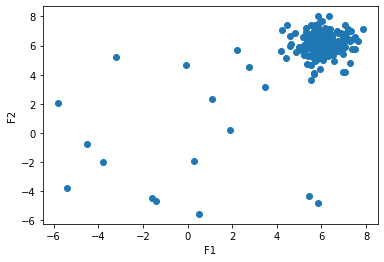

In [4]:
from pyod.utils.data import generate_data, get_outliers_inliers

#generate random data with two features
X_train, Y_train = generate_data(n_train=200,train_only=True, n_features=2)

# by default the outlier fraction is 0.1 in generate data function 
outlier_fraction = 0.1

# store outliers and inliers in different numpy arrays
x_outliers, x_inliers = get_outliers_inliers(X_train,Y_train)

n_inliers = len(x_inliers)
n_outliers = len(x_outliers)

#separate the two features and use it to plot the data 
F1 = X_train[:,[0]].reshape(-1,1)
F2 = X_train[:,[1]].reshape(-1,1)

# create a meshgrid 
xx , yy = np.meshgrid(np.linspace(-10, 10, 200), np.linspace(-10, 10, 200))

# scatter plot 
plt.scatter(F1,F2)
plt.xlabel('F1')
plt.ylabel('F2') ;

In [5]:
classifiers = {
     'Angle-based Outlier Detector (ABOD)'   : ABOD(contamination=outlier_fraction),
     'K Nearest Neighbors (KNN)' :  KNN(contamination=outlier_fraction)
}

No of Errors :  Angle-based Outlier Detector (ABOD) 0
No of Errors :  K Nearest Neighbors (KNN) 0


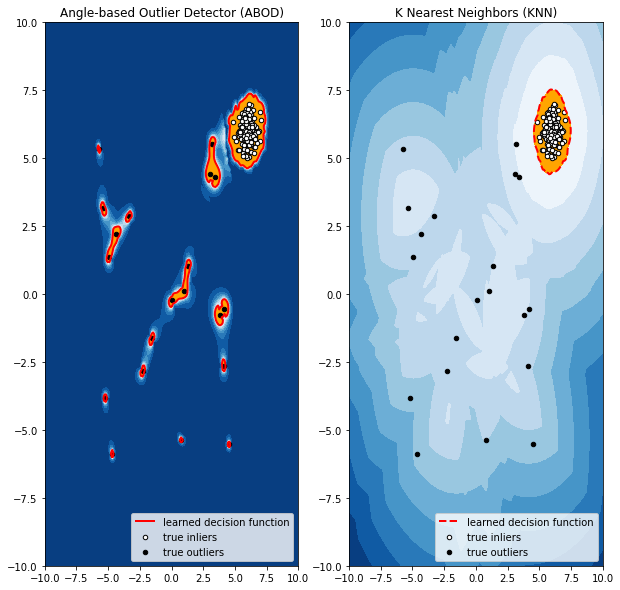

In [ ]:
#set the figure size
plt.figure(figsize=(10, 10))

for i, (clf_name,clf) in enumerate(classifiers.items()) :
    # fit the dataset to the model
    clf.fit(X_train)

    # predict raw anomaly score
    scores_pred = clf.decision_function(X_train)*-1

    # prediction of a datapoint category outlier or inlier
    y_pred = clf.predict(X_train)

    # no of errors in prediction
    n_errors = (y_pred != Y_train).sum()
    print('No of Errors : ',clf_name, n_errors)

    # rest of the code is to create the visualization

    # threshold value to consider a datapoint inlier or outlier
    threshold = stats.scoreatpercentile(scores_pred,100 *outlier_fraction)

    # decision function calculates the raw anomaly score for every point
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]) * -1
    Z = Z.reshape(xx.shape)

    subplot = plt.subplot(1, 2, i + 1)

    # fill blue colormap from minimum anomaly score to threshold value
    subplot.contourf(xx, yy, Z, levels = np.linspace(Z.min(), threshold, 10),cmap=plt.cm.Blues_r)

    # draw red contour line where anomaly score is equal to threshold
    a = subplot.contour(xx, yy, Z, levels=[threshold],linewidths=2, colors='red')

    # fill orange contour lines where range of anomaly score is from threshold to maximum anomaly score
    subplot.contourf(xx, yy, Z, levels=[threshold, Z.max()],colors='orange')

    # scatter plot of inliers with white dots
    b = subplot.scatter(X_train[:-n_outliers, 0], X_train[:-n_outliers, 1], c='white',s=20, edgecolor='k') 
    # scatter plot of outliers with black dots
    c = subplot.scatter(X_train[-n_outliers:, 0], X_train[-n_outliers:, 1], c='black',s=20, edgecolor='k')
    subplot.axis('tight')

    subplot.legend(
        [a.collections[0], b, c],
        ['learned decision function', 'true inliers', 'true outliers'],
        prop=matplotlib.font_manager.FontProperties(size=10),
        loc='lower right')

    subplot.set_title(clf_name)
    subplot.set_xlim((-10, 10))
    subplot.set_ylim((-10, 10))
plt.show(); 

In [6]:
import pandas as pd
import numpy as np

# Import models
from pyod.models.abod import ABOD
from pyod.models.cblof import CBLOF
from pyod.models.feature_bagging import FeatureBagging
from pyod.models.hbos import HBOS
from pyod.models.iforest import IForest
from pyod.models.knn import KNN
from pyod.models.lof import LOF

In [ ]:
random_state = np.random.RandomState(42)
outliers_fraction = 0.05

# Define seven outlier detection tools to be compared
classifiers = {
        'Angle-based Outlier Detector (ABOD)': ABOD(contamination=outliers_fraction),
        'Cluster-based Local Outlier Factor (CBLOF)':CBLOF(contamination=outliers_fraction,check_estimator=False, random_state=random_state),
        'Feature Bagging':FeatureBagging(LOF(n_neighbors=35),contamination=outliers_fraction,check_estimator=False,random_state=random_state),
        'Histogram-base Outlier Detection (HBOS)': HBOS(contamination=outliers_fraction),
        'Isolation Forest': IForest(contamination=outliers_fraction,random_state=random_state),
        'K Nearest Neighbors (KNN)': KNN(contamination=outliers_fraction),
        'Average KNN': KNN(method='mean',contamination=outliers_fraction)
}

In [ ]:
xx , yy = np.meshgrid(np.linspace(0,1 , 200), np.linspace(0, 1, 200))

for i, (clf_name, clf) in enumerate(classifiers.items()):
    clf.fit(X)
    # predict raw anomaly score
    scores_pred = clf.decision_function(X) * -1
        
    # prediction of a datapoint category outlier or inlier
    y_pred = clf.predict(X)
    n_inliers = len(y_pred) - np.count_nonzero(y_pred)
    n_outliers = np.count_nonzero(y_pred == 1)
    plt.figure(figsize=(10, 10))
    
    # copy of dataframe
    dfx = df
    dfx['outlier'] = y_pred.tolist()
    
    # IX1 - inlier feature 1,  IX2 - inlier feature 2
    IX1 =  np.array(dfx['Item_MRP'][dfx['outlier'] == 0]).reshape(-1,1)
    IX2 =  np.array(dfx['Item_Outlet_Sales'][dfx['outlier'] == 0]).reshape(-1,1)
    
    # OX1 - outlier feature 1, OX2 - outlier feature 2
    OX1 =  dfx['Item_MRP'][dfx['outlier'] == 1].values.reshape(-1,1)
    OX2 =  dfx['Item_Outlet_Sales'][dfx['outlier'] == 1].values.reshape(-1,1)
         
    print('OUTLIERS : ',n_outliers,'INLIERS : ',n_inliers, clf_name)
        
    # threshold value to consider a datapoint inlier or outlier
    threshold = stats.scoreatpercentile(scores_pred,100 * outliers_fraction)
        
    # decision function calculates the raw anomaly score for every point
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]) * -1
    Z = Z.reshape(xx.shape)
          
    # fill blue map colormap from minimum anomaly score to threshold value
    plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), threshold, 7),cmap=plt.cm.Blues_r)
        
    # draw red contour line where anomaly score is equal to thresold
    a = plt.contour(xx, yy, Z, levels=[threshold],linewidths=2, colors='red')
        
    # fill orange contour lines where range of anomaly score is from threshold to maximum anomaly score
    plt.contourf(xx, yy, Z, levels=[threshold, Z.max()],colors='orange')
        
    b = plt.scatter(IX1,IX2, c='white',s=20, edgecolor='k')
    
    c = plt.scatter(OX1,OX2, c='black',s=20, edgecolor='k')
       
    plt.axis('tight')  
    
    # loc=2 is used for the top left corner 
    plt.legend(
        [a.collections[0], b,c],
        ['learned decision function', 'inliers','outliers'],
        prop=matplotlib.font_manager.FontProperties(size=20),
        loc=2)
      
    plt.xlim((0, 1))
    plt.ylim((0, 1))
    plt.title(clf_name)
    plt.show()

NameError: ignored

In [ ]:
from sklearn.datasets import make_moons, make_blobs

# Example settings
n_samples = 300
outliers_fraction = 0.15
#n_outliers = int(outliers_fraction * n_samples)
#n_inliers = n_samples - n_outliers

# Define datasets
blobs_params = dict(random_state=0, n_samples=n_inliers, n_features=2)
datasets = [
    make_blobs(centers=[[0, 0], [0, 0]], cluster_std=0.5, **blobs_params)[0],
    make_blobs(centers=[[2, 2], [-2, -2]], cluster_std=[0.5, 0.5], **blobs_params)[0],
    make_blobs(centers=[[2, 2], [-2, -2]], cluster_std=[1.5, 0.3], **blobs_params)[0],
    4.0
    * (
        make_moons(n_samples=n_samples, noise=0.05, random_state=0)[0]
        - np.array([0.5, 0.25])
    ),
    14.0 * (np.random.RandomState(42).rand(n_samples, 2) - 0.5),
]


In [ ]:
X = datasets[0]
y = np.ones((X.shape[0],1))

from sklearn.model_selection import train_test_split

X_train, X_test, _, _ = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
clf = classifiers['Cluster-based Local Outlier Factor (CBLOF)']

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(X_train)
x_train = scaler.transform(X_train)
x_test = scaler.transform(X_test)

In [ ]:
clf.fit(x_train)

CBLOF(alpha=0.9, beta=5, check_estimator=False, clustering_estimator=None,
   contamination=0.05, n_clusters=8, n_jobs=None,
   random_state=RandomState(MT19937) at 0x7F6C0735BD10, use_weights=False)

In [ ]:
# predict raw anomaly score
scores_pred = clf.decision_function(x_train) * -1
    
# prediction of a datapoint category outlier or inlier
y_pred = clf.predict(x_train)
n_inliers = len(y_pred) - np.count_nonzero(y_pred)
n_outliers = np.count_nonzero(y_pred == 1)

In [24]:
def gram_schmidt(X):
    """
    Implements Gram-Schmidt orthogonalization.

    Parameters
    ----------
    X : an n x k array with linearly independent columns

    Returns
    -------
    U : an n x k array with orthonormal columns
    """

    # Set up
    n, k = X.shape
    U = np.empty((n, k))
    I = np.eye(n)

    # The first col of U is just the normalized first col of X
    v1 = X[:,0]
    U[:, 0] = v1 / np.sqrt(np.sum(v1 * v1))   #np.linalg.norm(v1)

    for i in range(1, k):
        # Set up
        b = X[:, i]       # The vector we're going to project
        Z = X[:, 0:i]     # First i-1 columns of X

        # Project onto the orthogonal complement of the col span of Z
        M = I - Z @ np.linalg.inv(Z.T @ Z) @ Z.T      # 'residual maker'
        u = M @ b

        # Normalize
        U[:, i] = u / np.sqrt(np.sum(u * u))
    return U

In [38]:
from pyod.utils.data import generate_data

X, y = generate_data(n_train = 10000, n_features = 30, contamination = 0.01, train_only=True)  # generate data
X.shape

(10000, 30)

In [34]:
d = X.shape[1]

from math import ceil

r = 2 + ceil(np.sqrt(d)/2)
r

5

In [35]:
Y = np.random.uniform(low=-1, high=1, size=d*r).reshape(d,r)
Y.shape

(30, 5)

In [37]:
E = gram_schmidt(Y)
E.shape

(30, 5)

In [39]:
X_til = X @ E    # project X onto orthogonalized random vectors
X_til.shape

(10000, 5)

In [29]:
# Beispiel:
# https://python-advanced.quantecon.org/orth_proj.html
y = [1, 3, -3]

X = [[1,  0],
     [0, -6],
     [2,  2]]

X, y = [np.asarray(z) for z in (X, y)]
X

array([[ 1,  0],
       [ 0, -6],
       [ 2,  2]])

In [26]:
Py1 = X @ np.linalg.inv(X.T @ X) @ X.T @ y    # project y onto X
Py1

array([-0.56521739,  3.26086957, -2.2173913 ])

In [27]:
# Now let’s do the same using an orthonormal basis created from our gram_schmidt function
U = gram_schmidt(X)
U

array([[ 0.4472136 , -0.13187609],
       [ 0.        , -0.98907071],
       [ 0.89442719,  0.06593805]])

In [28]:
Py2 = U @ U.T @ y   # same as P*y
Py2

array([-0.56521739,  3.26086957, -2.2173913 ])

# Marginal likelihood Dirichlet-Multinomial

In [ ]:
from matplotlib import pyplot as plt 
import numpy as np  
import pandas as pd

In [ ]:
K = 20    # number of bins
N = 2000
alphas = [1/2]*K
p_prior = np.random.dirichlet(alpha = alphas, size = 1)
#p_prior = np.random.dirichlet(alpha = (10,5,3,2,3,7), size = 1)
p_prior = list(p_prior[0])

In [ ]:
#np.random.multinomial(20, p_prior, size=1)

In [ ]:
#y = np.random.poisson(5, N)
y = np.random.normal(0,1,N)

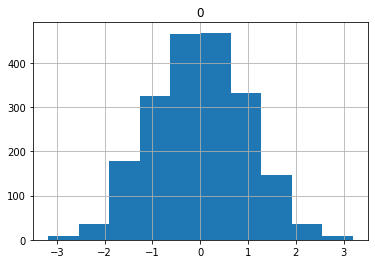

In [ ]:
pd.DataFrame(y).hist();

In [ ]:
#bin_edges, hist = np.unique(y, return_counts=True)

#freq = dict(zip(bin_edges, hist))
#freq

In [ ]:
#N = len(y)
M = 100

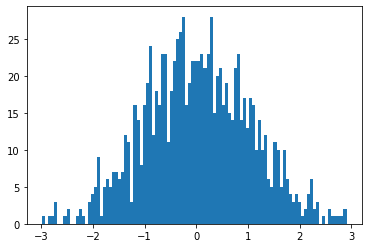

In [ ]:
# create the histogram
counts, bins, patches = plt.hist(y, bins=M, label='hst')

In [ ]:
i = 0
patches[i].get_xy()

(-2.985014723257893, 0.0)

In [ ]:
patches[i].get_width()

0.05895507759742413

In [ ]:
patches[i].get_height()

1.0

In [ ]:
len(bins)

101

In [ ]:
bins = np.linspace(min(y), max(y), M+1)
counts, bin_edges = np.histogram(y, bins = bins)

In [ ]:
#counts, bin_edges = np.histogram(y, bins = range(M+1))
#dict(zip(bin_edges, counts))

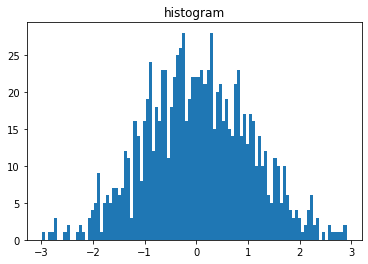

In [ ]:
plt.hist(y, bins=M, label='hst')
plt.title("histogram") 
plt.show()

In [ ]:
len(counts)

100

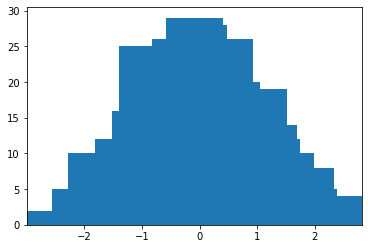

In [ ]:
plt.bar(bin_edges[:-1], counts, width = 1)
plt.xlim(min(bin_edges), max(bin_edges))
plt.show()

In [ ]:
from scipy.special import loggamma

def log_post_nbins(M : int, y : np.array):
  """Log posterior of number of bins M
     using conjugate Jeffreys' prior for the bin probabilities
  """
  N = len(y)
  counts, bin_edges = np.histogram(y, bins = np.linspace(min(y), max(y), M+1))   # evenly spaced bins
  post_M = N*np.log(M) + loggamma(M/2) -M*loggamma(1/2) -loggamma(N + M/2) + np.sum(loggamma(counts + 1/2)) 
  return post_M

In [ ]:
def geometric_prior(M, gamma = 0.7, max_M = 100):
  """Geometric (power series) prior"""
  gamma = (gamma < 1)*gamma    # assuming |gamma| < 1 for convergence of the series
  P0 = (1-gamma)/(1-gamma**(max_M))
  return P0*gamma**M 

In [ ]:
N = 50000
y = np.random.normal(0,1,N)

4500


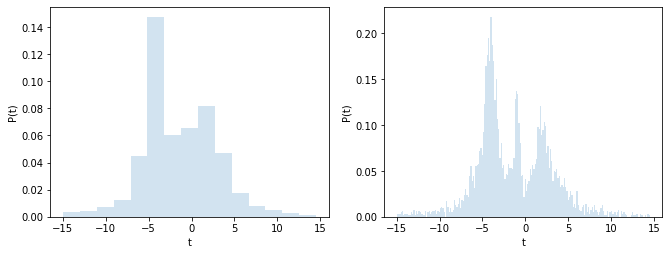

In [ ]:
# https://www.astroml.org/examples/algorithms/plot_bayesian_blocks.html

from scipy import stats
from copy import deepcopy

# draw a set of variables
np.random.seed(0)
t = np.concatenate([stats.cauchy(-5, 1.8).rvs(500),
                    stats.cauchy(-4, 0.8).rvs(2000),
                    stats.cauchy(-1, 0.3).rvs(500),
                    stats.cauchy(2, 0.8).rvs(1000),
                    stats.cauchy(4, 1.5).rvs(500)])
print(len(t))
# truncate values to a reasonable range
t = t[(t > -15) & (t < 15)]

#------------------------------------------------------------
# First figure: show normal histogram binning
fig = plt.figure(figsize=(10, 4))
fig.subplots_adjust(left=0.1, right=0.95, bottom=0.15)

ax1 = fig.add_subplot(121)
ax1.hist(t, bins=15, histtype='stepfilled', alpha=0.2, density=True)
ax1.set_xlabel('t')
ax1.set_ylabel('P(t)')

ax2 = fig.add_subplot(122)
ax2.hist(t, bins=200, histtype='stepfilled', alpha=0.2, density=True)
ax2.set_xlabel('t')
ax2.set_ylabel('P(t)');

y = deepcopy(t)

In [ ]:
from scipy.stats import iqr
from tqdm import tqdm

# Calculate posterior based on flat prior for M:
max_M = 200
#lpr = {} ; #gamma = 0.35
#for m in tqdm(range(1,max_M, 1)):
#  lprob = log_post_nbins(m, y) #+ np.log(geometric_prior(m, gamma = gamma, max_M = max_M))
#  lpr[m] = lprob

lpr = {m:log_post_nbins(m, y)for m in range(1,max_M, 1)}
#---------------------------------------
opt_M = max(lpr, key=lpr.get)   # MAP estimate of number of bins

print(f'\nMAP number of bins: {opt_M}')
print(f'Sturges rule: {int(1 + 3.322*np.log(len(y)))}')

# Freedman-Diaconis rule:
bw = 2*iqr(y)*N**(-1/3)
FD = (max(y) - min(y))/bw
print(f'Freedman-Diaconis rule: {int(FD)}')

#v = list(lpr.values())      # log posterior values of M; sum over support of posterior of M next
#print(f'Log-marginal likelihood (of gamma): {np.log(np.sum(np.exp(v - max(v))))}')   # logSumExp trick



MAP number of bins: 43
Sturges rule: 28
Freedman-Diaconis rule: 90


Use MAP estimate and calculate histogram estimate of pdf:

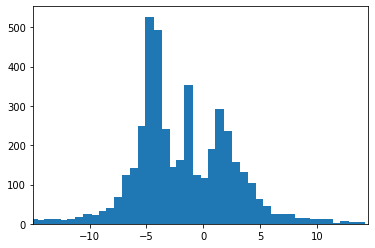

In [ ]:
counts, bin_edges = np.histogram(y, bins = np.linspace(min(y), max(y), opt_M + 1))
plt.bar(bin_edges[:-1], counts)
plt.xlim(min(bin_edges), max(bin_edges))
plt.show();

In [ ]:
#sorted(lpr.items(), key=lambda pair: pair[1], reverse=True)
#sorted(lpr.keys(), reverse=True)

Plot log-posterior of number of bins:

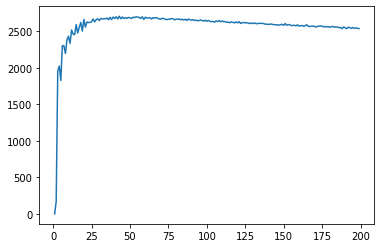

In [ ]:
#dict(zip(range(1,max_M, 1), lpr))

fig = plt.figure()
ax = plt.axes()
ax.plot(list(lpr.keys()), list(lpr.values()));

Plot prior of number of bins:

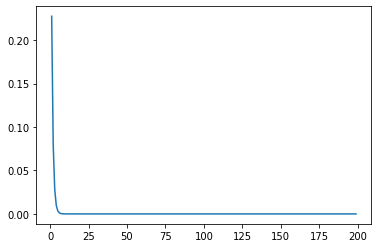

In [ ]:
#max_M = 200
#gamma = 0.95
gp = [geometric_prior(m, gamma = gamma, max_M = max_M) for m in range(1,max_M, 1)] 

fig = plt.figure()
ax = plt.axes()
ax.plot(range(1,max_M, 1), gp);

In [ ]:
def log_post_gamma(gamma : float, lpr : dict, eps = 1e-10):
  """Reuse precalculated log-posterior prob. masses of M ('lpr') (implying a flat prior) 
     and combining it with the log-geometric prior
  """
  lpr2 = {}; max_M = max(list(lpr.keys()))
  for m, lprob_m in lpr.items():
    lpr2[m] = lprob_m + np.log(geometric_prior(m, gamma = gamma, max_M = max_M) + eps)
  v = list(lpr2.values())      # log posterior values of M; sum over support of posterior of M next
  log_gamma = np.log(np.sum(np.exp(v - max(v))))   # logSumExp trick
  return log_gamma

In [ ]:
log_post_gamma(gamma = 0.5, lpr = lpr)

0.0021606218461697364

Log-posterior of gamma:

0.6084810126582278


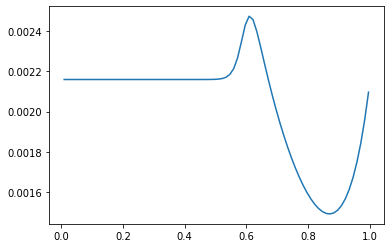

In [ ]:
# Evaluate on grid of gamma values
lp_gam = {g:log_post_gamma(gamma = g, lpr = lpr) for g in np.linspace(0.01,0.995, 80)}

opt_gamma = max(lp_gam, key=lp_gam.get)   # MAP estimate of gamma
print(opt_gamma)

fig = plt.figure()
ax = plt.axes()
ax.plot(list(lp_gam.keys()), list(lp_gam.values()));

No handles with labels found to put in legend.


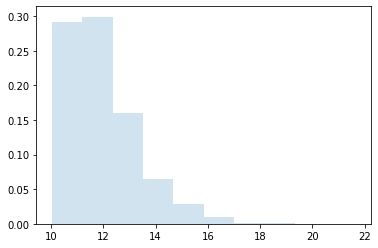

In [ ]:
#r = np.random.exponential(scale=5, size=N)
from scipy.stats import expon, gamma

#r = expon.rvs(loc = 10, size=N)
r = gamma.rvs(loc = 10, a = 2, size=N)

fig, ax = plt.subplots(1, 1)
ax.hist(r, density=True, histtype='stepfilled', alpha=0.2)
ax.legend(loc='best', frameon=False)
plt.show();